In [7]:
#paremeters to be inputted
#change the paremeters before running the program!!!
#if on jupyter, again change the parameters and then run this part!!!

#put star name
starName = 'HD 183143' #do put space between HD and number

#select molecule as follows -
# 2-Methylnaphthalene -> 1
# Acenaphthene -> 2
# Benzo[ghi]perylene -> 3
# Pentacene -> 4
# Perylene -> 5
# Phenanthrene -> 6
# Pyrene -> 7
# Any other molecule -> 0 and input the molecule name (according to parameters file)
moleculeNo = 5

#put lower range of wavelengths to extract from edibles data
minWave = 4000

#put upper range of wavelengths to extract from edibles data
maxWave = 4200

In [8]:
#getting molecule name from given molecule number above
#if on jupyter, just run this part

if moleculeNo == 1:
    molName = '2MethylNaphthalene'
elif moleculeNo == 2:
    molName = 'Acenaphthene'
elif moleculeNo == 3:
    molName = 'Benzoghiperylene'
elif moleculeNo == 4:
    molName = 'Pentacene'
elif moleculeNo == 5:
    molName = 'Perylene'
elif moleculeNo == 6:
    molName = 'Phenanthrene'
elif moleculeNo == 7:
    molName = 'Pyrene'
elif moleculeNo == 0:
    molName = input('Enter molecule file name (as in parameters file):\n')

In [19]:
#importing necessary libraries
#if on jupyter, just run this part

import numpy as np
import matplotlib.pyplot as plt
from edibles.utils.edibles_oracle import EdiblesOracle
from edibles.utils.edibles_spectrum import EdiblesSpectrum
from edibles.utils.ContinuumFitter import ContinuumFitter
from stackingFunctions import widthNormLinStacker
from lmfit.models import VoigtModel
import copy
from stackingFunctions import observationStacker

In [10]:
#loading relevant data files from edibles
#if on jupyter, just run this part

pythia = EdiblesOracle()
rawList = pythia.getFilteredObsList(object = [starName], MergedOnly = True, WaveMin = minWave, WaveMax = maxWave)
fnames = rawList.tolist()

E:\college\mitacs\ediblesDataDR4
***Common Objects***
['HD 183143']
**Filtered File List**
18814    /HD183143/BLUE_437/HD183143_w437_n1_20180907_B...
18836    /HD183143/BLUE_437/HD183143_w437_n2_20180912_B...
Name: Filename, dtype: object
2


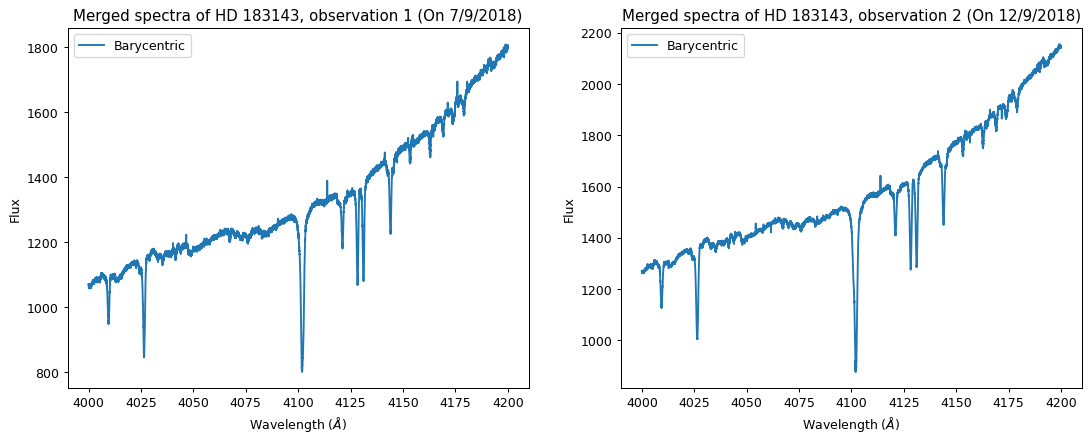

In [11]:
#extracting information from data files and plotting the graphs
#if on jupyter, just run this part

#structure of array of all datasRaw array is as ->
#[array of info of first observation,
# array of info of second observation,
# array of info of third observation,.....]
#
#where structure of array of info of a observation is as ->
#[date of observation as a string, array of data of observation]
#
#where in the array of data of observation, first column is the wavelengths 
#and second column is the respective intensities

datasRaw = np.empty(shape = len(fnames), dtype = object)

ffig1, faxs1 = plt.subplots(-((-len(fnames))//2), 2, figsize=(12,-5*((-len(fnames))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it1, file in enumerate(fnames):
    sp = EdiblesSpectrum(file)
    sp.getSpectrum(xmin = minWave, xmax = maxWave)
    
    #infoArr first column  -> date (string)
    #        second column -> data
    infoArr = np.empty(shape = 2, dtype = object)
    infoArr[0] = str(sp.datetime.day) + '/' + str(sp.datetime.month) + '/' + str(sp.datetime.year)
    infoArr[1] = np.array([sp.bary_wave, sp.bary_flux]).transpose()
    
    datasRaw[it1] = infoArr
    
    if(len(fnames) < 3):
        desax1 = faxs1[it1]
    else:
        desax1 = faxs1[it1//2, it1 - 2 * (it1//2)]
    
    desax1.plot(sp.bary_wave, sp.bary_flux, label="Barycentric")
    tit1 = 'Merged spectra of ' + starName + ', observation ' + str(it1+1) + ' (On ' + str(sp.datetime.day) + '/' + str(sp.datetime.month) + '/' + str(sp.datetime.year) + ')'
    desax1.set_title(tit1)
    desax1.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
    desax1.legend()

if not ((len(fnames) - 2 * (len(fnames)//2)) == 0):
    ffig1.delaxes(faxs1[len(fnames)//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

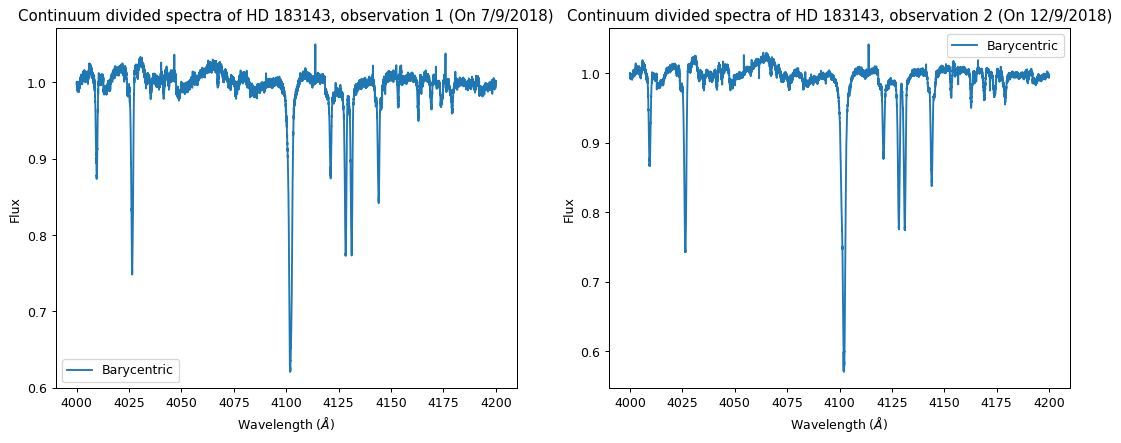

In [12]:
#removing the continuum from the spectrum
#if on jupyter, just run this part

#structure of array of all datasContRem array (after continuum removal is done) is as ->
#[array of info of first observation,
# array of info of second observation,
# array of info of third observation,.....]
#
#where structure of array of info of a observation is as ->
#[date of observation as a string, array of data of observation]
#
#where in the array of data of observation, first column is the wavelengths 
#and second column is the respective intensities (continuum removed)

datasContRem = copy.deepcopy(datasRaw)

ffig2, faxs2 = plt.subplots(-((-len(datasContRem))//2), 2, figsize=(12,-5*((-len(datasContRem))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it2 in range(len(datasContRem)):
    CF2 = ContinuumFitter(datasRaw[it2][1][:, 0], datasRaw[it2][1][:, 1])
    CS1, contPoints1  = CF2.SplineManualAnchor()
    datasContRem[it2][1][:, 1] = datasRaw[it2][1][:, 1]/CS1(datasRaw[it2][1][:, 0])
    
    if(len(datasContRem) < 3):
        desax2 = faxs2[it2]
    else:
        desax2 = faxs2[it2//2, it2 - 2 * (it2//2)]
    
    desax2.plot(datasContRem[it2][1][:, 0], datasContRem[it2][1][:, 1], label="Barycentric")
    tit2 = 'Continuum divided spectra of ' + starName + ', observation ' + str(it2+1) + ' (On ' + datasContRem[it2][0] + ')'
    desax2.set_title(tit2)
    desax2.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
    desax2.legend()

if not ((len(datasContRem) - 2 * (len(datasContRem)//2)) == 0):
    ffig2.delaxes(faxs2[len(datasContRem)//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

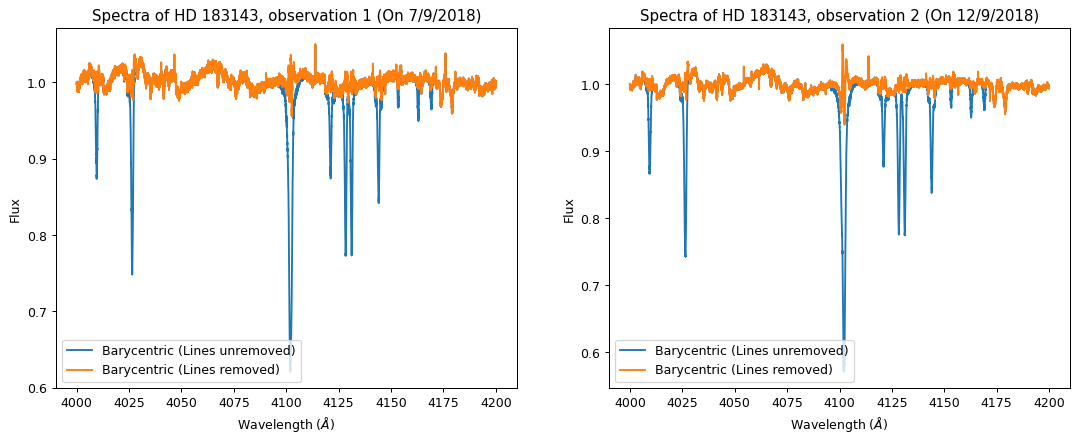

In [14]:
#removing the stellar lines from the spectrum
#if on jupyter, just run this part

#structure of array of all datasLineRem array (after stellar line removal is done) is as ->
#[array of info of first observation,
# array of info of second observation,
# array of info of third observation,.....]
#
#where structure of array of info of a observation is as ->
#[date of observation as a string, array of data of observation]
#
#where in the array of data of observation, first column is the wavelengths 
#and second column is the respective intensities (continuum and stellar line removed)

datasLineRem = copy.deepcopy(datasContRem)

ffig3, faxs3 = plt.subplots(-((-len(datasLineRem))//2), 2, figsize=(12,-5*((-len(datasLineRem))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it3 in range(len(datasLineRem)):
    CF3 = ContinuumFitter(datasContRem[it3][1][:, 0], datasContRem[it3][1][:, 1])
    wvs1 = CF3.SelectPoints(n=100, y_message = 'Select peak start and end points')[:, 0]
    peakRanges = np.reshape(wvs1, (int(wvs1.size/2), 2))
    for it4 in range(peakRanges.shape[0]):
        yForFit1 = 1 - datasContRem[it3][1][np.logical_and(datasContRem[it3][1][:, 0] >= peakRanges[it4, 0], datasContRem[it3][1][:, 0] <= peakRanges[it4, 1]), 1]
        xForFit1 = datasContRem[it3][1][np.logical_and(datasContRem[it3][1][:, 0] >= peakRanges[it4, 0], datasContRem[it3][1][:, 0] <= peakRanges[it4, 1]), 0]
        mod1 = VoigtModel()
        params1 = mod1.guess(yForFit1, x = xForFit1)
        res1 = mod1.fit(yForFit1, params1, x = xForFit1)
        datasLineRem[it3][1][np.logical_and(datasLineRem[it3][1][:, 0] >= peakRanges[it4, 0], datasLineRem[it3][1][:, 0] <= peakRanges[it4, 1]), 1] = (1 - yForFit1)/(1 - res1.best_fit)
        
    if(len(datasLineRem) < 3):
        desax3 = faxs3[it3]
    else:
        desax3 = faxs3[it3//2, it3 - 2 * (it3//2)]
    
    desax3.plot(datasContRem[it3][1][:, 0], datasContRem[it3][1][:, 1], label="Barycentric (Lines unremoved)")
    desax3.plot(datasLineRem[it3][1][:, 0], datasLineRem[it3][1][:, 1], label="Barycentric (Lines removed)")
    tit3 = 'Spectra of ' + starName + ', observation ' + str(it3+1) + ' (On ' + datasLineRem[it3][0] + ')'
    desax3.set_title(tit3)
    desax3.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
    desax3.legend()

if not ((len(datasLineRem) - 2 * (len(datasLineRem)//2)) == 0):
    ffig3.delaxes(faxs3[len(datasLineRem)//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

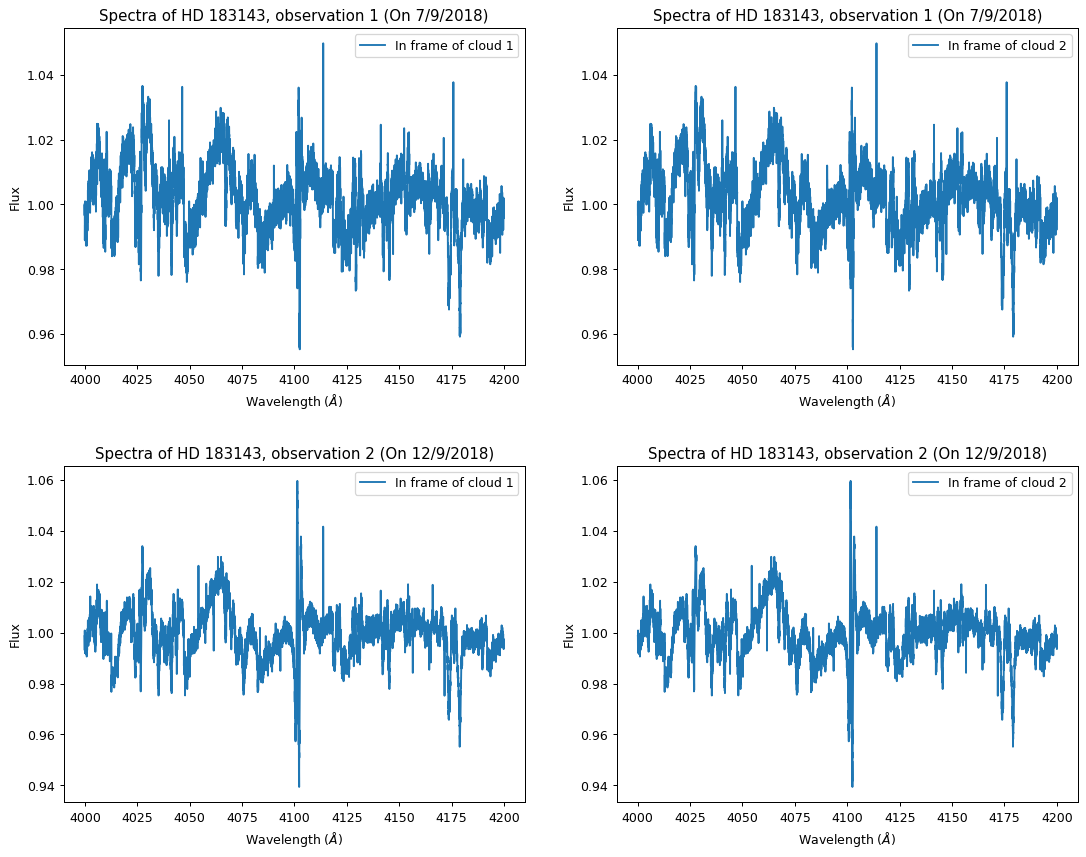

In [15]:
#shifting the spectrum to the clouds' frame
#if on jupyter, just run this part

#structure of datas array (after frame shifting is done) is as ->
#[array of all observations info in first cloud frame, 
# array of all observations info in second cloud frame, 
# array of all observations info in third cloud frame,.....]
#
#where structure of array of all observations info in a cloud's frame is as ->
#[array of info of first observation,
# array of info of second observation,
# array of info of third observation,.....]
#
#where structure of array of info of a observation is as ->
#[date of observation as a string, array of data of observation]
#
#where in the array of data of observation, first column is the wavelengths (shifted in frame of cloud) 
#and second column is the respective intensities (continuum and stellar line removed)


with open(r'E:\college\mitacs\codes\cloudVels.txt') as f:
    for line in f:
        # Remove newline char
        line = line.replace('\n', '')

        # Split the line into a list by a comma
        line = line.split(',')
        
        if(line[0]) == starName.replace(' ', ''):
            vels = line[1].split(';')
            break

datas = np.empty(shape = len(vels), dtype = object)
for it7 in range(len(vels)):
    datas[it7] = copy.deepcopy(datasLineRem)

ffig4, faxs4 = plt.subplots(-((-len(datas)*len(vels))//2), 2, figsize=(12,-5*((-len(datas)*len(vels))//2)))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

for it5 in range(len(datas)):
    for it6 in range(len(vels)):
        datas[it6][it5][1][:, 0] = datas[it6][it5][1][:, 0] * (1 + (float(vels[it6])/299792.458))
        
        if(len(datas)*len(vels) < 3):
            desax4 = faxs4[it5*len(vels) + it6]
        else:
            desax4 = faxs4[(it5*len(vels) + it6)//2, it5*len(vels) + it6 - 2 * ((it5*len(vels) + it6)//2)]
    
        lab1 = 'In frame of cloud ' + str(it6+1)
        desax4.plot(datas[it6][it5][1][:, 0], datas[it6][it5][1][:, 1], label=lab1)
        tit4 = 'Spectra of ' + starName + ', observation ' + str(it5+1) + ' (On ' + datas[it6][it5][0] + ')'
        desax4.set_title(tit4)
        desax4.set(xlabel = r'Wavelength ($\AA$)', ylabel = 'Flux')
        desax4.legend()
        
if not ((len(datas)*len(vels) - 2 * ((len(datas)*len(vels))//2)) == 0):
    ffig4.delaxes(faxs4[(len(datas)*len(vels))//2, 1])

plt.subplots_adjust(hspace=0.3, wspace=0.2)

In [16]:
#loading the parameters of the given molecule
#if on jupyter, just run this part

paramFile = 'C:\\Users\\hkhan\\edibles\edibles\\utils\\Harshit\\Lab Spectra Parameters\\' + molName + 'Params.txt'
molParam = np.loadtxt(paramFile)
#print(perylene)

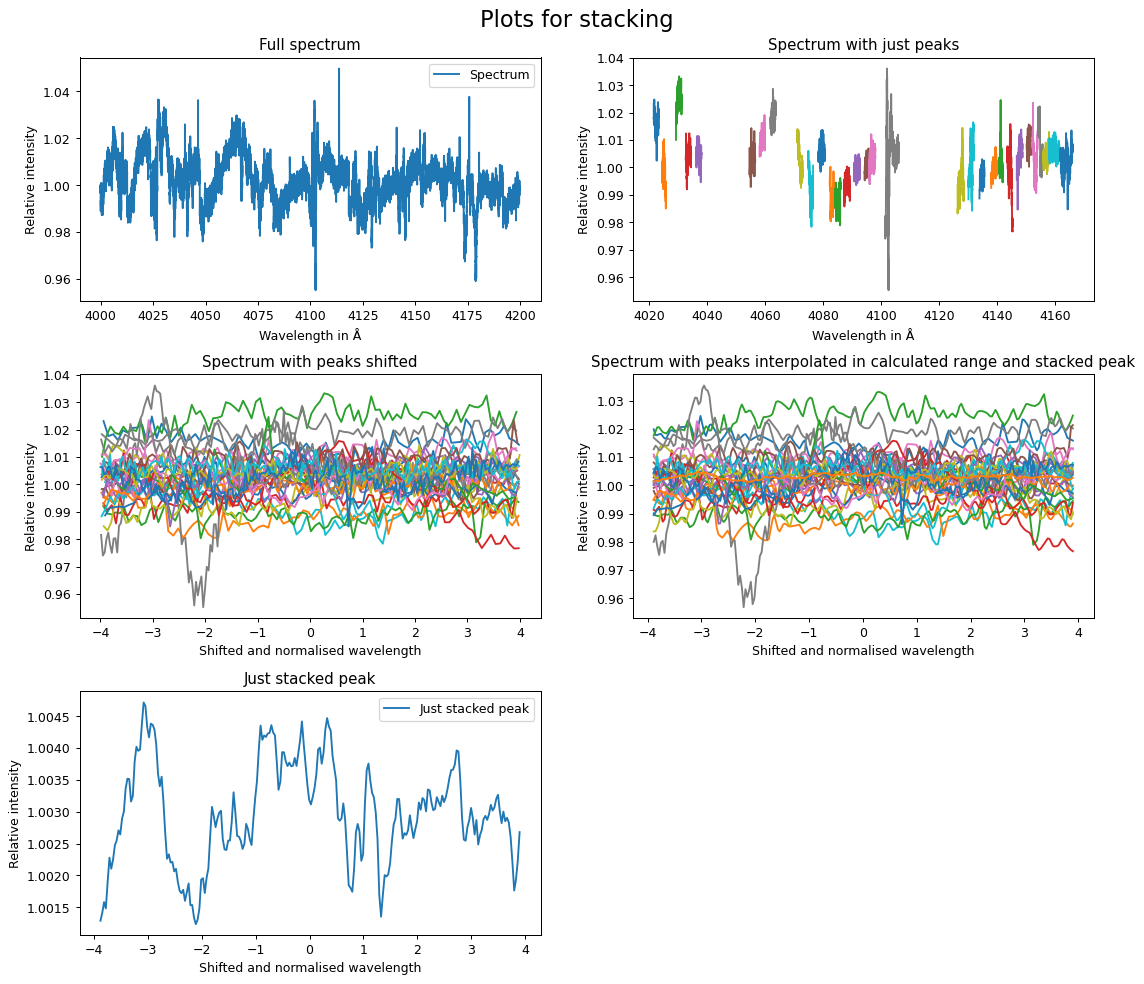

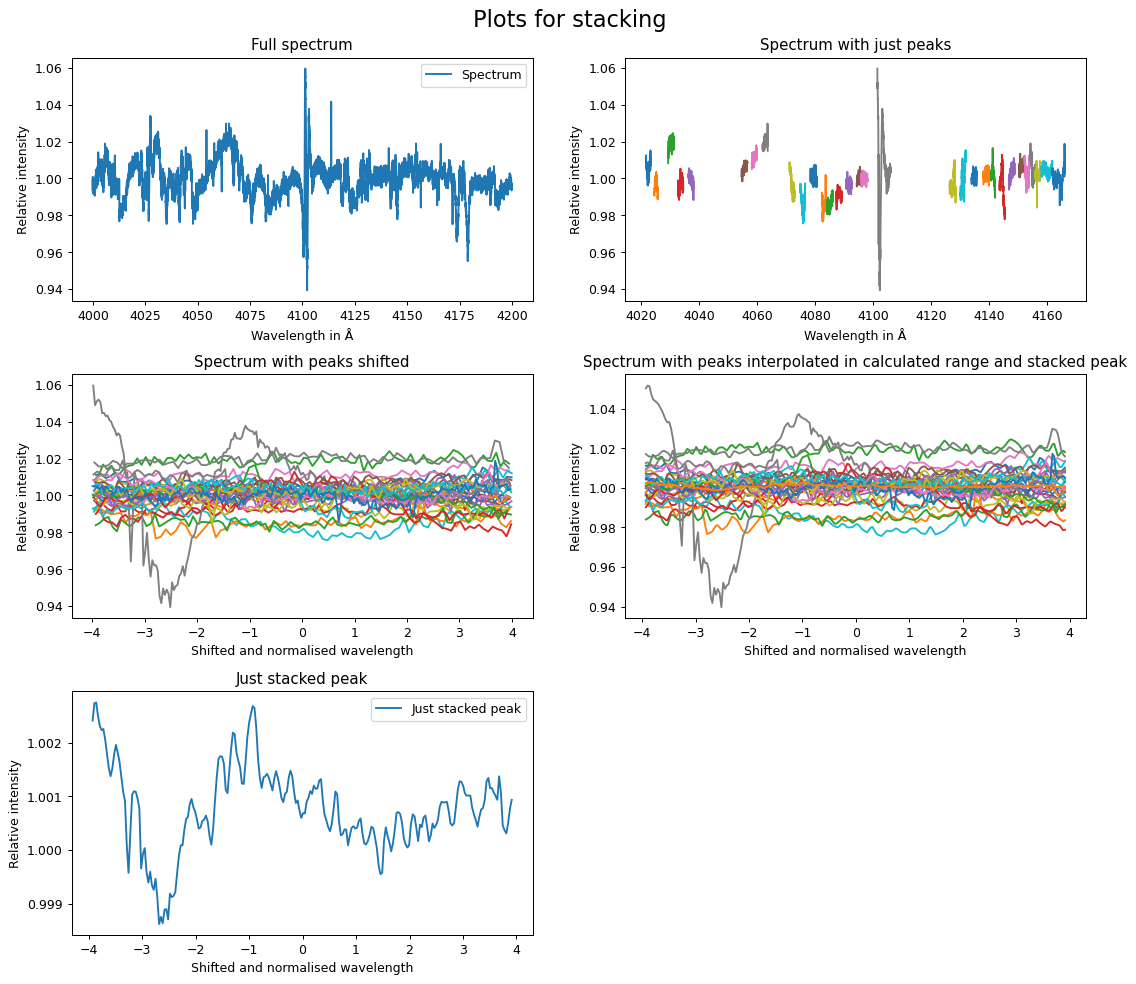

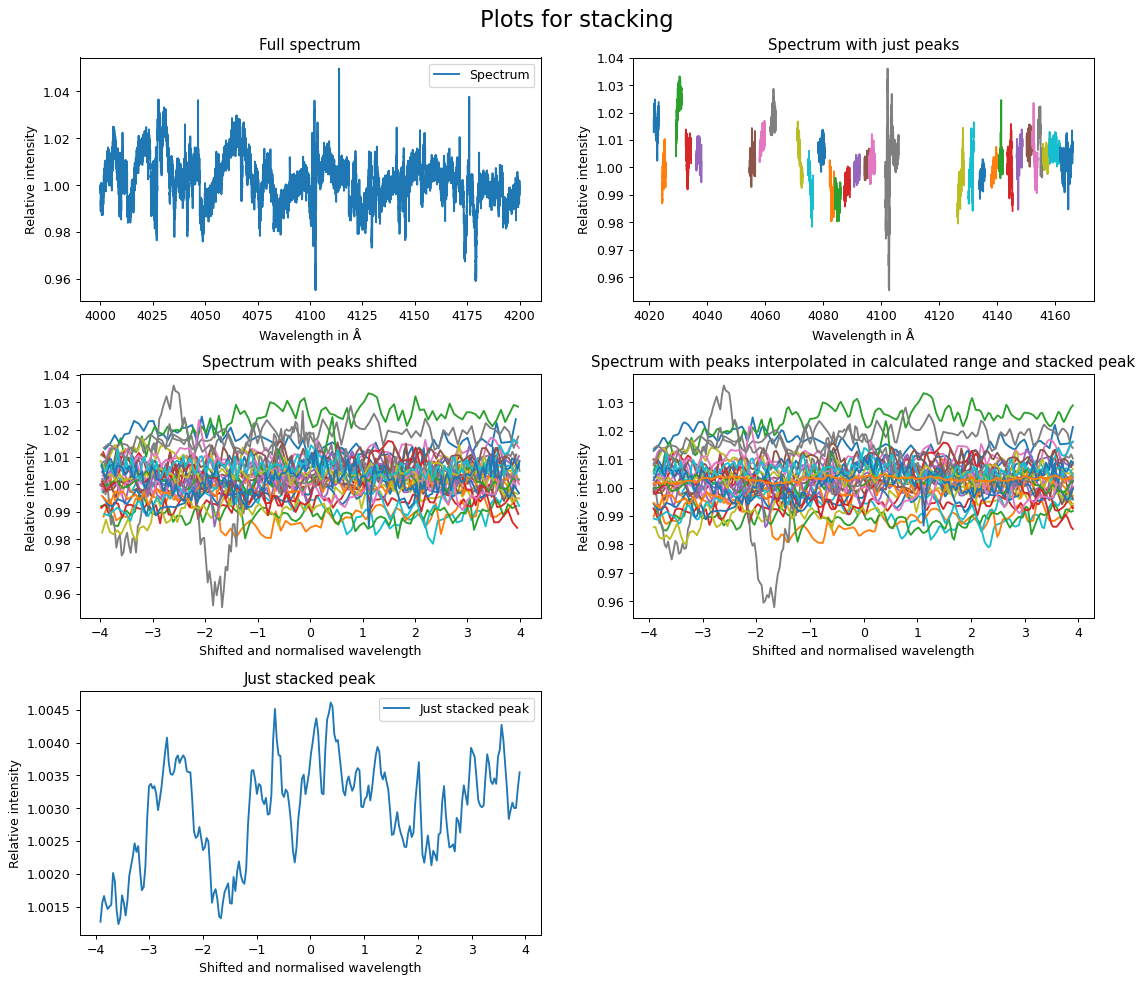

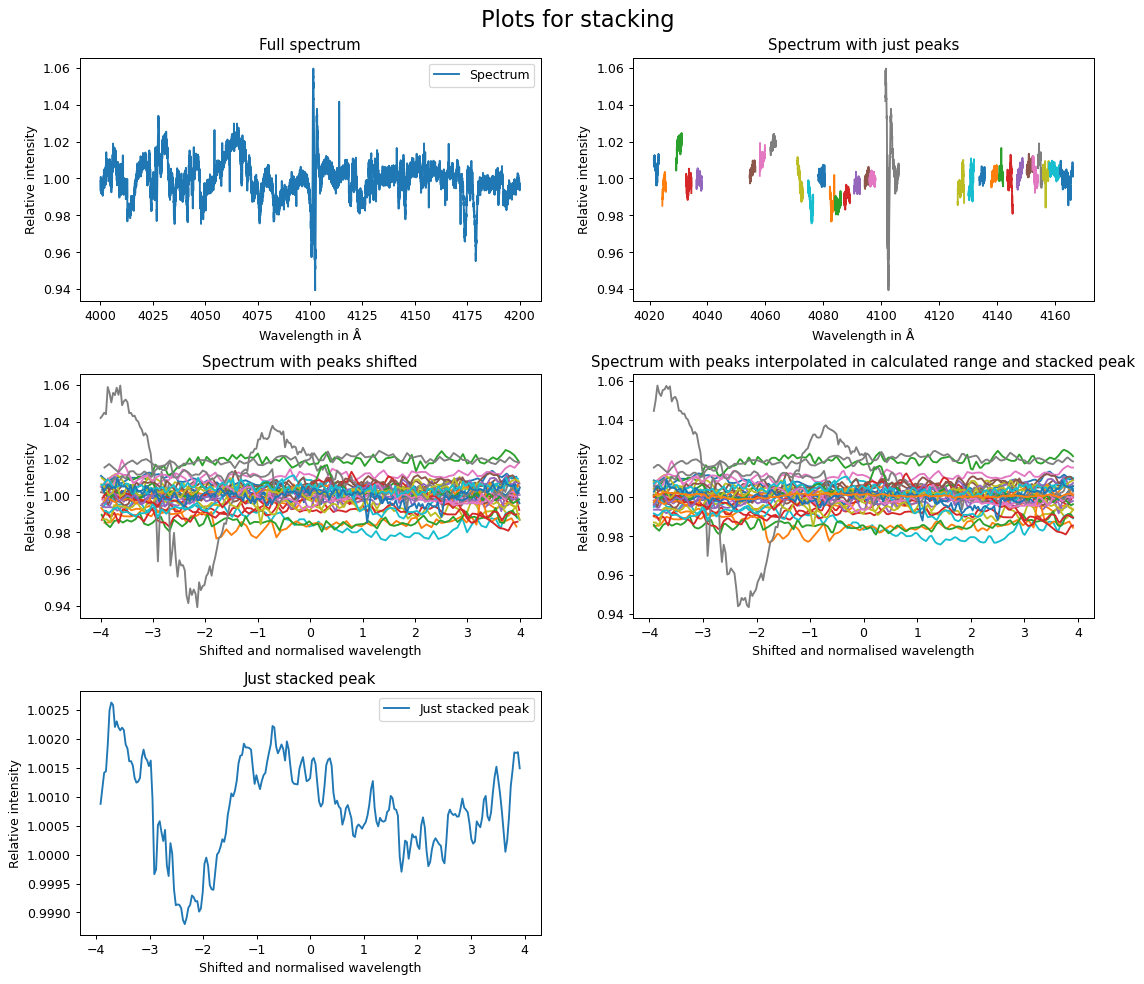

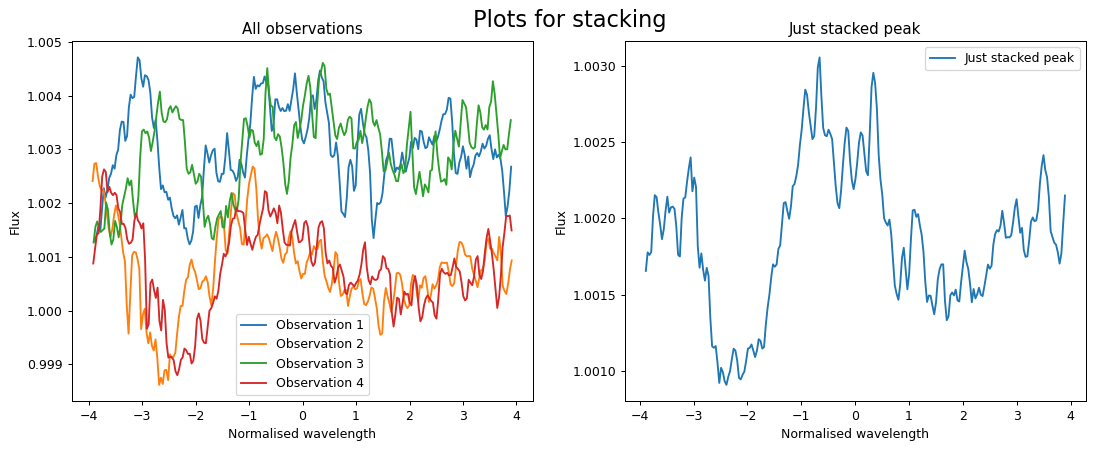

In [21]:
#stacking
#if on jupyter, just run this part

#print(datas[0].shape)
#print(np.logical_and(datas[:, 0] >= 4085, datas[:, 0] <= 4115).shape)

#totalStack = np.empty()
#stackRanges = np.zeros((len(datas)*len(datas[0]), 2))
#totalpoints = 0

"""
for it10 in range(len(datas)):
    for it11 in range(len(datas[it10])):
        totalpoints = totalpoints + datas[it10][it11][1].shape[0]
        
totalStack = np.zeros((totalpoints, 2))
"""
totalStack = np.empty(shape = len(datas)*len(datas[0]), dtype = object)
#print(totalStack.shape)

for it8 in range(len(datas)):
    for it9 in range(len(datas[it8])):
        totalStack[it8 * len(datas[it8]) + it9] = widthNormLinStacker(datas[it8][it9][1], molParam)
        
#print(totalStack.shape)
#print(stackRanges)
finalStacked = observationStacker(totalStack, [['Normalised wavelength', 'No units'], ['Flux', 'No units']])